In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Stores.csv')

In [3]:
df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [4]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [5]:
df.shape

(896, 5)

In [6]:
df["Store_Sales"].idxmax()

649

In [7]:
df.iloc[648]

Store ID                  649
Store_Area               1514
Items_Available          1794
Daily_Customer_Count     1400
Store_Sales             54820
Name: 648, dtype: int64

In [8]:
df["Store_Sales"].idxmin()

31

In [9]:
df.iloc[30]

Store ID                   31
Store_Area               1439
Items_Available          1746
Daily_Customer_Count      990
Store_Sales             80140
Name: 30, dtype: int64

In [11]:
"df.duplicated().sum()

0

In [12]:
df.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [14]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [15]:
df.corr()["Store_Sales"].sort_values()

Daily_Customer_Count    0.008629
Store ID                0.071486
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

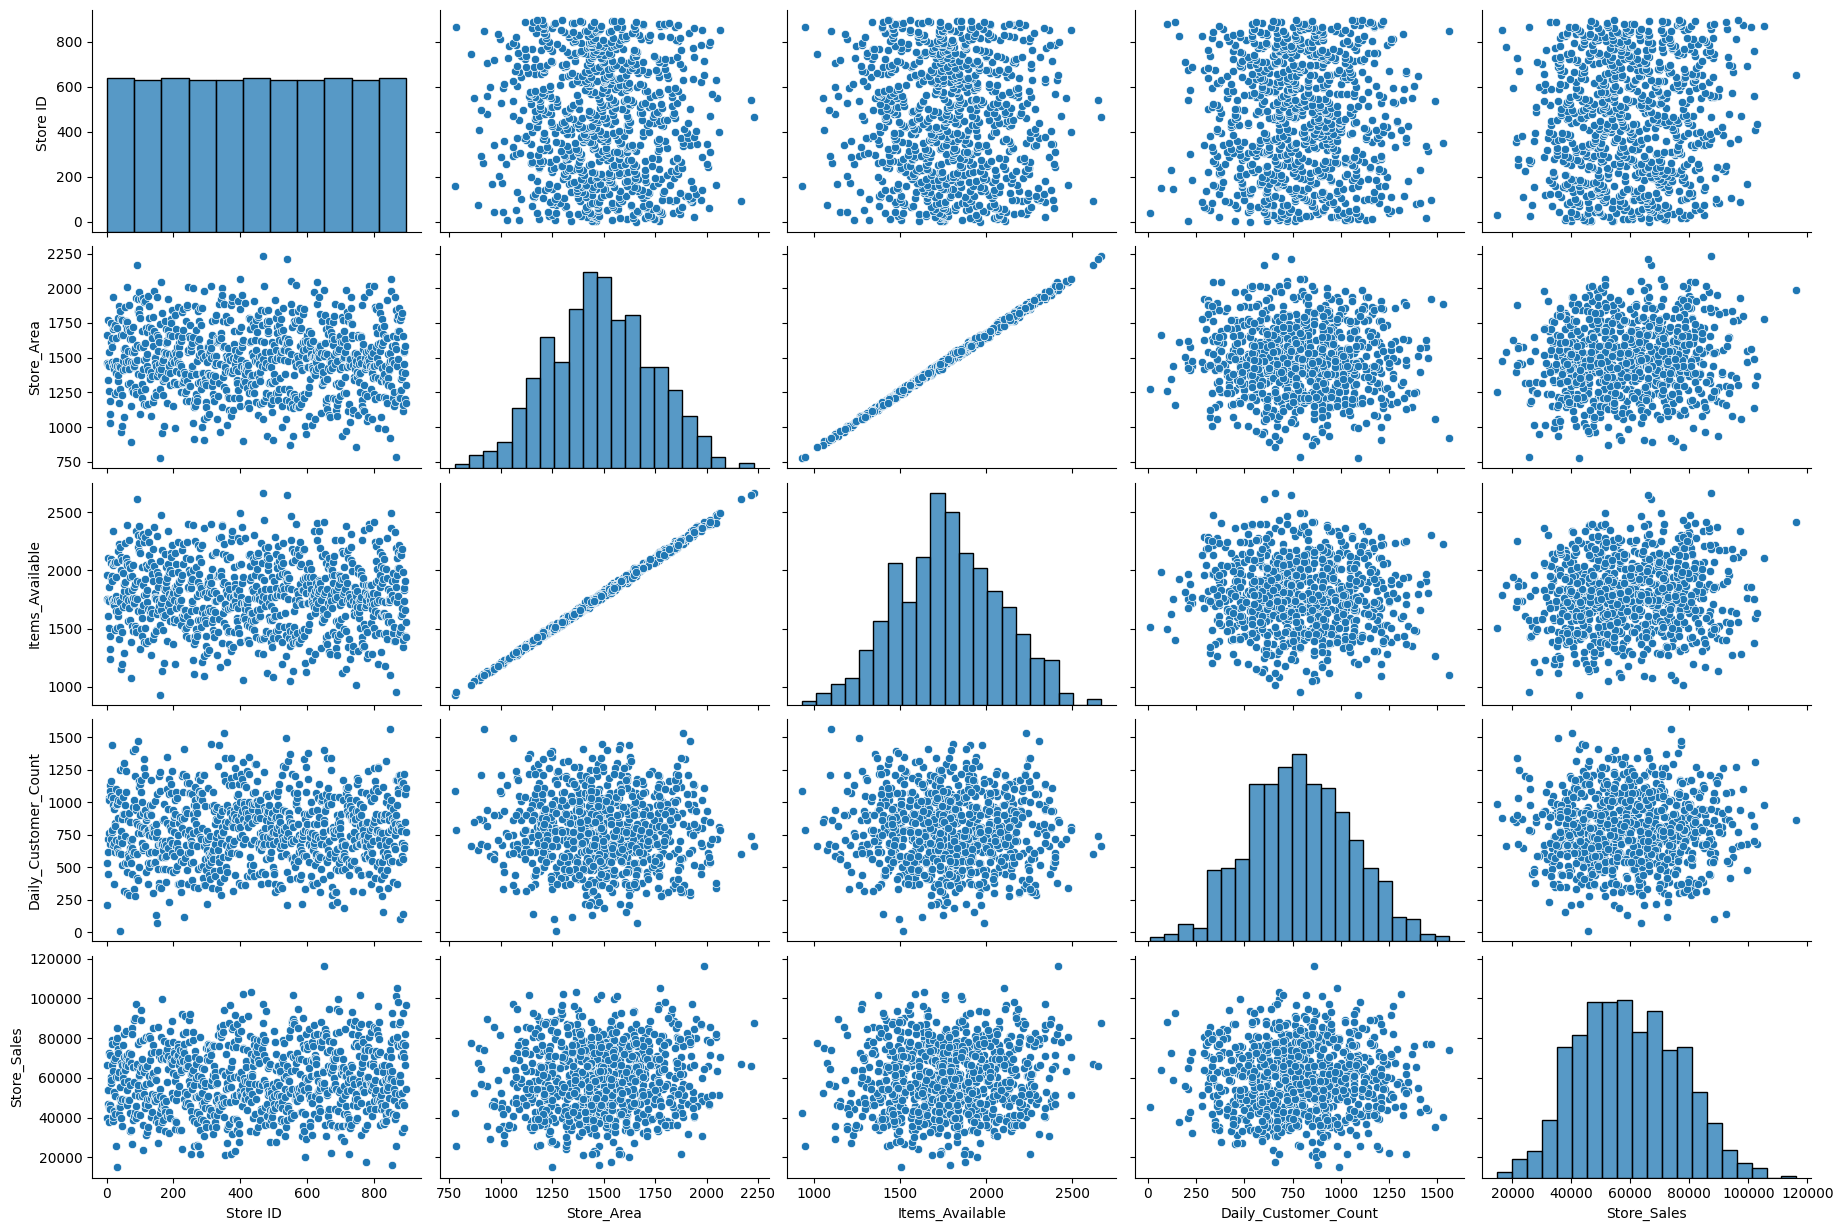

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,aspect=1.5)
plt.show()

<Figure size 4000x2000 with 0 Axes>

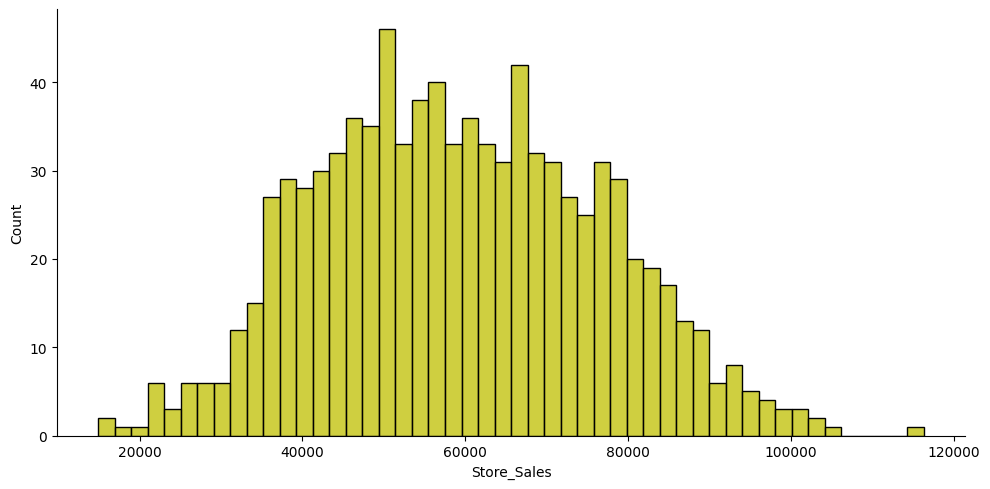

In [23]:
plt.figure(figsize=(20,10), dpi=200)
sns.displot(data=df,x="Store_Sales", bins=50, color= "y", aspect=2)

In [24]:
#Feature Engineering

In [28]:
import numpy as np

In [26]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [30]:
IQRDailyCustomerCount= 970-600
upperlim=970+1.5*IQRDailyCustomerCount
lowerlim=600-1.5*IQRDailyCustomerCount
df.iloc[df["Daily_Customer_Count"]>upperlim]=np.nan
df.iloc[df["Daily_Customer_Count"]<lowerlim]=np.nan

In [31]:
df=df.dropna()

In [36]:
X=df[["Store_Area", "Items_Available", "Daily_Customer_Count"]]
y=df["Store_Sales"]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=100,test_size=0.3)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [42]:
#Machine Learning

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
def modelresults(predictions):
  print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
  print("Root mean squared error on model is {}".format(np.sqrt(np.sqrt(mean_squared_error(y_test,predictions)))))

In [44]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(scaled_X_train,y_train)
predictionslr= lr.predict(scaled_X_test)
modelresults(predictionslr)

Mean absolute error on model is 14349.998699736743
Root mean squared error on model is 131.67230863457254


In [47]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(scaled_X_train,y_train)
predictionssvr= svr.predict(scaled_X_test)
modelresults(predictionssvr)

Mean absolute error on model is 14433.737586533161
Root mean squared error on model is 132.04800209965887


In [48]:
from sklearn.model_selection import GridSearchCV
svrmodel= SVR()
param_gridsvr={'C':[0.001,0.01,0.1,0.5],'kernel':['linear','rbf', 'poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr= GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [49]:
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 0.5, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}


In [50]:
predsgridsvr=gridsvr.predict(scaled_X_test)
modelresults(predsgridsvr)

Mean absolute error on model is 14337.852864100898
Root mean squared error on model is 131.66541164317135


In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(scaled_X_train,y_train)
predsrfr=rfr.predict(scaled_X_test)
modelresults(predsgridsvr)

Mean absolute error on model is 14337.852864100898
Root mean squared error on model is 131.66541164317135


In [55]:
rfrmodel= RandomForestRegressor()
param_gridrfr={'bootstrap':[True], 'max_depth':[5,10,15],'max_features':['auto','log2']}
gridrfr= GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(scaled_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2']})

In [56]:
print("Best parameters for model is {}".format(gridrfr.best_params_))

Best parameters for model is {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2'}


In [57]:
predsgridrfr=gridrfr.predict(scaled_X_test)

In [58]:
modelresults(predsgridrfr)

Mean absolute error on model is 14503.53937295331
Root mean squared error on model is 132.38881938513438
